In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [22]:
#loading data in python
dim_date = pd.read_csv("D:\dim_date.csv")
dim_hotels= pd.read_csv("D:\dim_hotels.csv")
dim_rooms= pd.read_csv("D:\dim_rooms.csv")
fact_aggregated_bookings= pd.read_csv(r"D:\fact_aggregated_bookings.csv")
fact_bookings= pd.read_csv(r"D:\fact_bookings.csv")


**checking number of rows and collumns in datadset**

In [8]:
dim_date.shape

(92, 4)

In [9]:
dim_hotels.shape

(25, 4)

In [10]:
dim_rooms.shape

(4, 2)

In [11]:
fact_aggregated_bookings.shape

(9200, 5)

In [12]:
fact_bookings.shape

(134590, 12)

# **Understanding Data**

In [14]:
fact_aggregated_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   property_id          9200 non-null   int64 
 1   check_in_date        9200 non-null   object
 2   room_category        9200 non-null   object
 3   successful_bookings  9200 non-null   int64 
 4   capacity             9200 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 359.5+ KB


In [15]:
fact_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB


**checking records in the table**

In [17]:
dim_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [18]:
dim_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [19]:
dim_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [20]:
fact_aggregated_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18
9196,16559,31-Jul-22,RT4,13,18
9197,17558,31-Jul-22,RT4,3,6
9198,19563,31-Jul-22,RT4,3,6


In [21]:
fact_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


**Checking null values**

In [22]:
fact_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [27]:
fact_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


# **Data Manipulation and Data Preparation**

**converting datatype of booking_date, check_in_date, checkout_date to datetime**

In [23]:
from datetime import datetime, timedelta 
fact_bookings['booking_date'] = pd.to_datetime(fact_bookings['booking_date'])
fact_bookings['check_in_date'] = pd.to_datetime(fact_bookings['check_in_date'])
fact_bookings['checkout_date'] = pd.to_datetime(fact_bookings['checkout_date'])

In [24]:
fact_bookings['checkout_date'].head(5)

0   2022-05-02
1   2022-05-02
2   2022-05-04
3   2022-05-02
4   2022-05-02
Name: checkout_date, dtype: datetime64[ns]

**Viewing main transaction table 'fact_bookings' and then creating master table 'fact_booking_new' by joining this table with other tables of dataset to find measures and KPIs.** 

In [4]:
fact_bookings.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [3]:
fact_booking_new = fact_bookings.merge(right = dim_hotels, on = 'property_id', how= 'left')

In [7]:
fact_booking_new.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [4]:
fact_booking_new = fact_booking_new.merge(right = dim_rooms, left_on='room_category', right_on='room_id' )

In [13]:
fact_booking_new.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,room_id,room_class
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,RT1,Standard
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,RT1,Standard
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,RT1,Standard
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,RT1,Standard
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,RT1,Standard


**Deleting duplicate column from master table**

In [5]:
fact_booking_new.drop(['room_category'], axis=1, inplace=True)

**Filling blank values of 'ratings_given' collumn with average rating which is 4**

In [ ]:
fact_booking_new.fillna(4, inplace = True)

**Extracting month & day_type from date column and storing them in new columns.**

In [25]:
fact_booking_new['month'] = fact_booking_new['check_in_date'].dt.strftime('%m')
fact_booking_new['day_type'] = fact_booking_new['check_in_date'].dt.weekday.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

**converting month number to month name**

In [26]:
fact_booking_new['month']= pd.to_datetime(fact_booking_new['month'], format='%m').dt.month_name()

In [27]:
fact_booking_new.rename(columns={'day_type':'Day_name'}, inplace = True) #renaming column 

**Inserting a column catagorising day_names into day_types -'weekday','weekend'**

In [28]:
def day_catagory(day):
    if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
         return 'Weekday'
    elif day in  ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'invalid'

fact_booking_new['Day_type'] = fact_booking_new['Day_name'].map(day_catagory) 
fact_booking_new.head(5)    #checking the inserted column
      

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,room_id,room_class,month,Day_name,Day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,RT1,Standard,May,Sunday,Weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,others,4.0,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,RT1,Standard,May,Sunday,Weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,RT1,Standard,May,Sunday,Weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,others,4.0,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,RT1,Standard,May,Sunday,Weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,RT1,Standard,May,Sunday,Weekend


**Inserting a column week number**

In [29]:
fact_booking_new['week_no'] = fact_booking_new['check_in_date'].dt.week
fact_booking_new.head(3)   #checking the inserted column

C:\Users\SONY\AppData\Local\Temp\ipykernel_7816\1115636917.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  fact_booking_new['week_no'] = fact_booking_new['check_in_date'].dt.week


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,room_id,room_class,month,Day_name,Day_type,week_no
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,RT1,Standard,May,Sunday,Weekend,17
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,others,4.0,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,RT1,Standard,May,Sunday,Weekend,17
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,RT1,Standard,May,Sunday,Weekend,17


# **Finding Insights from Dataset**

**Finding main metrics and KPIs from data.**

In [20]:
print("Total revenue generated is ",fact_booking_new['revenue_generated'].sum())

Tot_bookings = fact_booking_new['booking_id'].count()
print("\nTotal bookings are ", Tot_bookings)
print("\nAverage rating is ",round(fact_booking_new['ratings_given'].mean()))

Tot_capacity = fact_aggregated_bookings['capacity'].sum()
print("\nTotal capacity is ", Tot_capacity)

success_bookings = fact_aggregated_bookings['successful_bookings'].sum()
print("\nTotal Succesful bookings ",success_bookings)

occupance_percentage = success_bookings/Tot_capacity
print("\nOccupancy % is ",occupance_percentage)

Tot_Cancel_Bookings = fact_booking_new.loc[fact_booking_new['booking_status']== "Cancelled"].booking_id.count()
print("\nTotal number of bookings cancelled are ", Tot_Cancel_Bookings)

print("\nCancellation Rate is ", round(Tot_Cancel_Bookings/Tot_bookings*100),"%")

Total revenue generated is  2007546215

Total bookings are  134590

Average rating is  4

Total capacity is  232576

Total Succesful bookings  134590

Occupancy % is  0.5786925564116676

Total number of bookings cancelled are  33420

Cancellation Rate is  25 %


**Analysis of booking status i.e. total number of Cancelled, Checked Out and  No show**

booking_status
Checked Out    94411
Cancelled      33420
No Show         6759
Name: booking_id, dtype: int64


([<matplotlib.patches.Wedge at 0x21b4be51e50>,
 [Text(-0.6506698424855413, 0.8869209412793461, 'Checked Out'),
  Text(0.5032406658098645, -0.9781353854529773, 'Cancelled'),
  Text(1.0863384498807669, -0.1728258438736895, 'No Show')],
 [Text(-0.3549108231739316, 0.4837750588796432, '70%'),
  Text(0.2744949086235624, -0.5335283920652603, '25%'),
  Text(0.5925482453895091, -0.09426864211292153, '5%')])

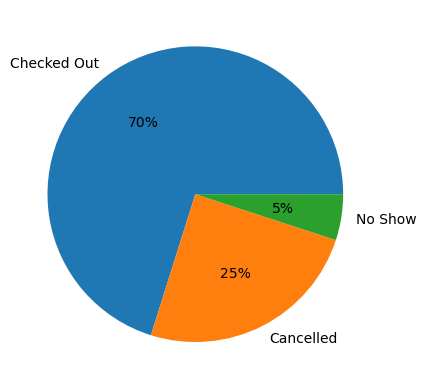

In [15]:
counts_book_status = fact_booking_new.groupby('booking_status').booking_id.count().sort_values(ascending=False)
print(counts_book_status)
plt.pie(counts_book_status, labels=['Checked Out','Cancelled','No Show'], autopct='%.0f%%')

**Total number of bookings on the basis of hotels catagory**


Total number of bookings on the basis of hotels catagory
 category
Luxury      83660
Business    50930
Name: booking_id, dtype: int64


<Axes: xlabel='category'>

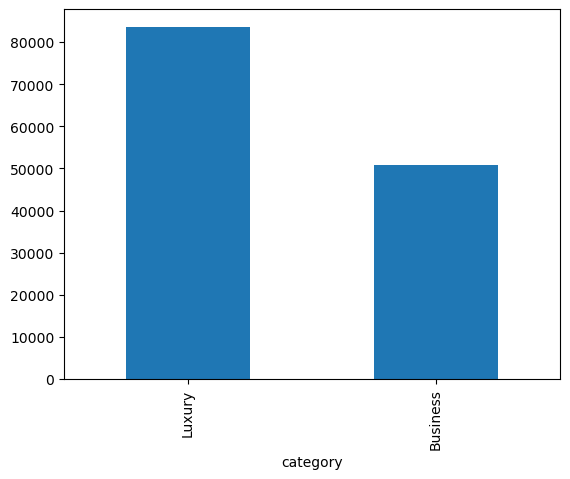

In [18]:
count_catagory = fact_booking_new.groupby('category').booking_id.count().sort_values(ascending=False)
print("\nTotal number of bookings on the basis of hotels catagory\n",count_catagory) 
count_catagory.plot.bar()

**Total number of bookings on the basis of room class**


Total number of bookings on the basis of room class
 room_class
Elite           49505
Standard        38446
Premium         30566
Presidential    16073
Name: booking_id, dtype: int64


([<matplotlib.patches.Wedge at 0x21b4f047d10>,
 [Text(0.44376379315665987, 1.0065156212812663, 'Elite'),
  Text(-1.0975394724017553, -0.07353303012984613, 'Standard'),
  Text(0.11744955879410295, -1.0937118455695132, 'Premium'),
  Text(1.023487867021435, -0.4030788831729021, 'Presidential')],
 [Text(0.24205297808545082, 0.5490085206988724, '37%'),
  Text(-0.5986578940373211, -0.04010892552537062, '29%'),
  Text(0.06406339570587433, -0.5965700975833708, '23%'),
  Text(0.5582661092844189, -0.21986120900340111, '12%')])

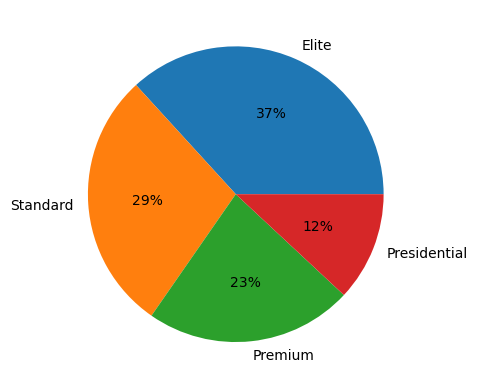

In [20]:
count_room_class = fact_booking_new.groupby('room_class').booking_id.count().sort_values(ascending=False)
print("\nTotal number of bookings on the basis of room class\n", count_room_class)
plt.pie(count_room_class,labels=['Elite','Standard','Premium','Presidential'], autopct='%.0f%%')

**Total number of bookings on the basis of booking_platform**


Total number of bookings on the basis of booking_platform
 booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_id, dtype: int64


<Axes: ylabel='booking_id'>

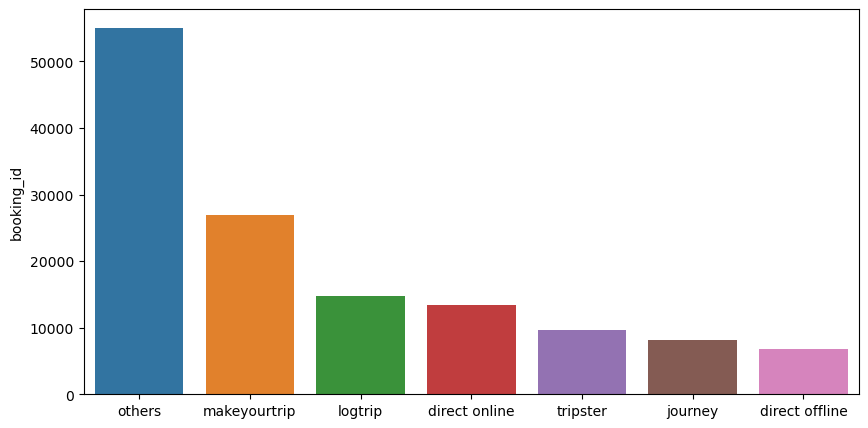

In [23]:
count_platform = fact_booking_new.groupby('booking_platform').booking_id.count().sort_values( ascending = False)
print("\nTotal number of bookings on the basis of booking_platform\n",count_platform)
x=['others','makeyourtrip','logtrip','direct online','tripster','journey','direct offline']
plt.figure(figsize=(10,5))
sns.barplot(x=x, y=count_platform)

**Total revenue based on hotel catagory**

In [53]:
catag_revenue = fact_booking_new.groupby('category').revenue_realized.sum().sort_values(ascending = False)
print("Total revenue based on hotel catagory\n",catag_revenue)

Total revenue based on hotel catagory
 category
Luxury      1052751932
Business     656019297
Name: revenue_realized, dtype: int64


**Total revenue based on room catagory**

Total revenue based on room catagory
 room_class
Elite           560271204
Premium         462166344
Presidential    376752786
Standard        309580895
Name: revenue_realized, dtype: int64


([<matplotlib.patches.Wedge at 0x21b4f3c09d0>,
 [Text(0.5662403055064873, 0.9430651708232682, 'Elite'),
  Text(-1.0705881840986329, 0.2526676474509386, 'Premium'),
  Text(-0.28300398653638753, -1.062971657009025, 'Presidential'),
  Text(0.9265847558310155, -0.5928243333919228, 'Standard')],
 [Text(0.3088583484580839, 0.514399184085419, '33%'),
  Text(-0.583957191326527, 0.13781871679142105, '27%'),
  Text(-0.15436581083802953, -0.5798027220049227, '22%'),
  Text(0.5054098668169175, -0.32335872730468507, '18%')])

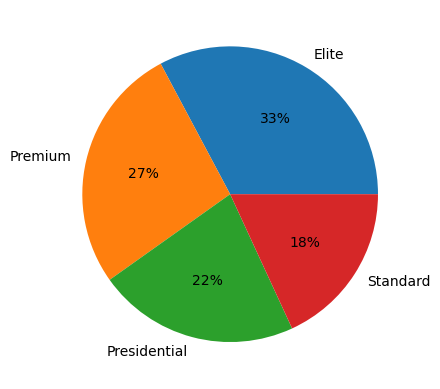

In [25]:
room_class_rev = fact_booking_new.groupby('room_class').revenue_realized.sum().sort_values(ascending = False)
print("Total revenue based on room catagory\n",room_class_rev)
plt.pie(room_class_rev,labels=['Elite','Premium','Presidential','Standard'], autopct='%.0f%%')

**Total revenue generated-------   Total revenue realised -------     % Revenue realised**

In [61]:
revenue_gen = fact_booking_new['revenue_generated'].sum()
revenue_real = fact_booking_new['revenue_realized'].sum()
perc_reven_real = round(revenue_real/revenue_gen*100)

print("Total revenue generated is ",revenue_gen)
print("\nTotal revenue realised is ",revenue_real)
print("\nPercentage revenue realised is ",perc_reven_real,"%")

Total revenue generated is  2007546215

Total revenue realised is  1708771229

Percentage revenue realised is  85 %


**showing monthly revenue realised through bar graph**

<Axes: xlabel='month'>

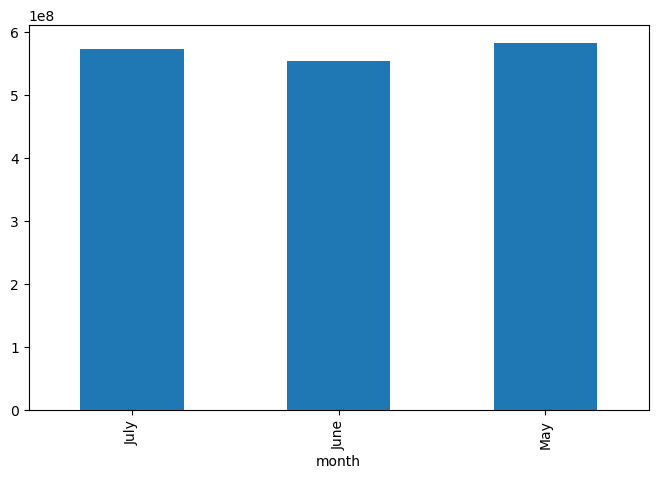

In [22]:
plt.figure(figsize=(8,5))
fact_booking_new.groupby('month')['revenue_realized'].sum().plot.bar()

In [80]:
# showing monthly revenue in tabular form
revenue_by_month = fact_booking_new.groupby('month').aggregate(Total_Rev_realised = ('revenue_realized', 'sum'))
revenue_by_month

,Total_Rev_realised
month,
July,572908208
June,553932355
May,581930666


**Total Revenue realised by Day_type**

In [63]:
 fact_booking_new.groupby('Day_type').revenue_realized.sum().sort_values(ascending=False)


Day_type
Weekday    1069703782
Weekend     639067447
Name: revenue_realized, dtype: int64

**Revenue realised by Week number**

<Axes: xlabel='week_no', ylabel='revenue_realized'>

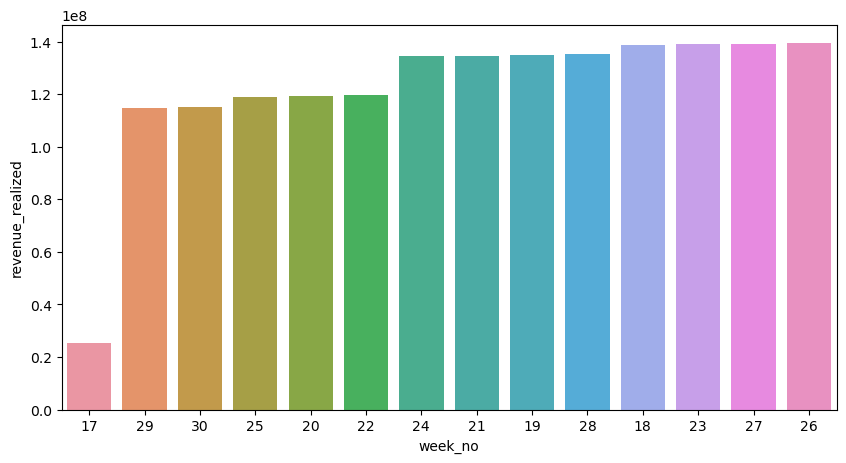

In [83]:
rev_weekno= fact_booking_new.groupby('week_no').revenue_realized.sum().sort_values(ascending=False)
rev_weekno=rev_weekno.reset_index() #resetting index so that week_no can act as column


# plot barplot 
plt.figure(figsize=(10,5))
sns.barplot(x='week_no', y='revenue_realized', data=rev_weekno, order=rev_weekno.sort_values('revenue_realized').week_no)


**Revenue by property name**

                        Total_revenue
property_name category               
Atliq Bay     Luxury        260051178
Atliq Blu     Luxury        260855522
Atliq City    Business      285811939
Atliq Exotica Luxury        320312468
Atliq Grands  Luxury        211532764
Atliq Palace  Business      304081863
Atliq Seasons Business       66125495


<Axes: xlabel='property_name', ylabel='Total_revenue'>

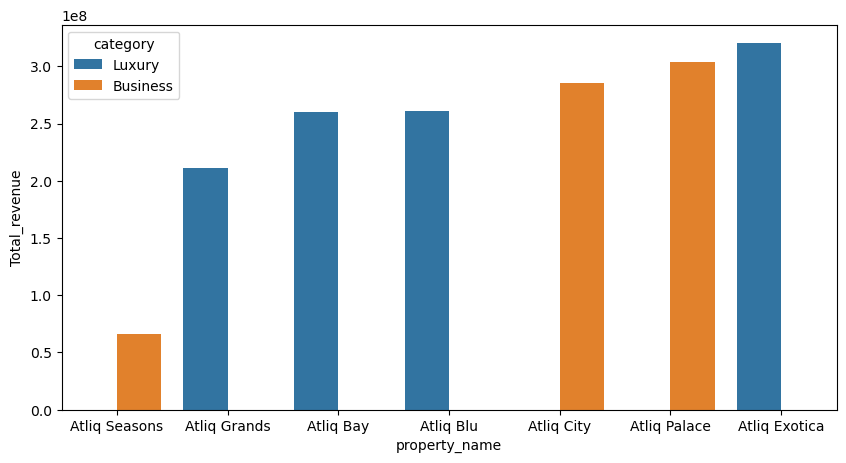

In [18]:
Reven_property=fact_booking_new.groupby(['property_name', 'category']).agg(Total_revenue=('revenue_realized','sum'))
print(Reven_property)
Reven_property= Reven_property.reset_index()
order=Reven_property.sort_values('Total_revenue').property_name

plt.figure(figsize=(10,5))
sns.barplot(x='property_name', y='Total_revenue', data=Reven_property, hue='category', order=order)